**Nama Kelompok** : Pitch Pine

**Anggota Kelompok**
*   Eka Fita Yanti (1806193602)
*   Carisa Putri Salsabila P (1806147483)
*   Nurul Shabrina (1806193703)

**Deskripsi** : Telah mengikuti lomba "Jaga Data Challange 2021" yang diselenggarakan oleh KPK 

Data yang digunakan merupakan data yang telah diberikan oleh panitia "Jaga Data Challenge" yang diperoleh dari data aplikasi JAGA.




#Package yang Digunakan

In [1]:
#import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data yang Digunakan

Data yang digunakan adalah dataset hasil penggabungan dari data yang telah diberikan oleh panitia, meliputi:
* Jumlah pelaporan LHKPN 
* Jumlah pelaporan gratifikasi
* Rata-rata dari nilai 8 area intervensi, mencakup Perencanaan dan penganggaran APBD, Pengadaan Barang dan Jasa, Perizinan, APIP, Manajemen ASN, Optimalisasi Pajak Daerah, Manajemen Aset Daerah, dan Tata Kelola Dana Desa

Adapun data yang digunakan adalah informasi pada tahun 2020 dan hanya untuk 29 dari 34 Provinsi yang disebabkan karena terdapat masalah dari kelengkapan informasi datanya. 

In [2]:
#import data dari repository github
!git clone https://github.com/ekafita/UAS-UI-2021-DATA-MINING.git

Cloning into 'UAS-UI-2021-DATA-MINING'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
#definisikan data
data = pd.read_excel('/content/DATA-MINING/DATA.xlsx')

In [ ]:
data.shape

(29, 11)

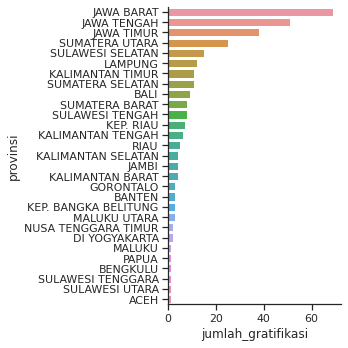

In [ ]:
#Visualisasi Gratifikasi

plot_order = data.groupby('provinsi')['jumlah_gratifikasi'].sum().sort_values(ascending=False).index.values

sns.catplot(data=data, x='jumlah_gratifikasi',  y='provinsi',kind='bar',ci=None, legend_out=False, order=plot_order)

***Interpretasi Visualisasi Pelaporan gratifikasi***

Pada Grafik diatas diperoleh informasi bahwa pada Provinsi Jawa Barat, Jawa Tengah, Jawa Timur, dan Sumatera Utara cukup banyak menerima pelaporan gratifikasi pada tahun 2020 jika dibandingkan dengan provinsi-provinsi lainnya.

**Pelaporan gratifikasi banyak**, maka provinsi tersebut marak akan terjadinya gratifikasi namun diimbangi dengan tingkat kesadaran penyelenggara negaranya akan gratifikasi cukup tinggi. 

**Pelaporan gratifikasi sedikit**, terdapat dua kemungkinan:
* Tingkat pelaporan gratifikasi rendah karena tidak sejalan dengan sikap jujur dari penyelenggara setempat. Pernyataan ini dapat mengarah pada kesimpulan bahwa penyelenggara negara cukup sering menikmati harta yang diperoleh dari gratifikasi. 
* adanya instansi-instansi di daerah tersebut yang telah menerapkan lingkungan anti gratifikasi seperti menolak pemberian dari masyarakat yang dapat dicurigai karena perannya sebagai penyelenggara negara. Oleh sebab itu jumlah pelaporan gratifikasinya kecil karena berhasil menolak pemberian tanpa perlu melakukan pelaporan


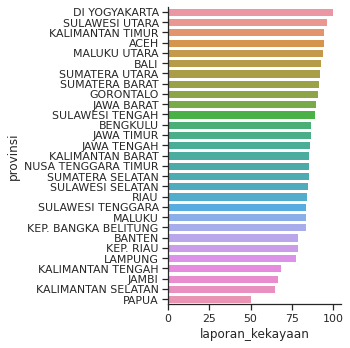

In [ ]:
#Visualisasi Laporan Kekayaan

plot_order = data.groupby('provinsi')['laporan_kekayaan'].sum().sort_values(ascending=False).index.values

sns.catplot(data=data, x='laporan_kekayaan',  y='provinsi',kind='bar',ci=None, legend_out=False, order=plot_order)

***Interpretasi Visualisasi Pelaporan LHKPN***
Pada Grafik diatas dapat dilihat bahwa pelaporan LHPKN bisa dikatakan sudah terealisasi dengan baik untuk pejabat eksekutif tingkat kota, kabupaten, dan provinsi. 
* Daerah Istimewa Yogyakarta berhasil mensukseskan upaya pencegahan korupsi di sektor LHKPN. 
* Provinsi Papua hanya setengah dari jumlah penyelenggara negara yang melaksanakan pelaporan harta kekayaan pada Tahun 2020. Hal ini menunjukkan bahwa perlu adanya peningkatan kesadaran akan pentingnya LHKPN pada Provinsi Papua sebagai bentuk menjaga kepercayaan masyarakat kepada pemerintah daerah melalui transparansi dan tanggung jawab bahwa harta kekayaannya diperoleh dari sumber yang sah.

In [ ]:
#menjadikan kolom/variabel provinsi sebagai index
data = data.set_index('provinsi')
data.head()

,jumlah_gratifikasi,laporan_kekayaan,manajemen_aset_daerah,optimalisasi_pajak_daerah,manajemen_asn,perizinan,pengadaan barang dan jasa,perencanaan_penganggaran_APBD,APIP,tata_kelola_dana_desa
provinsi,,,,,,,,,,
ACEH,1,94.444444,0.913278,1.872340,1.065071,0.536911,0.889354,0.805041,1.009875,0.379208
SUMATERA UTARA,25,92.307692,1.022558,1.313320,1.199450,0.538340,1.000495,0.921832,1.223571,0.392798
SUMATERA BARAT,8,91.666667,0.691020,1.110359,0.890132,0.466137,0.934580,0.925511,1.163571,0.460832
RIAU,5,84.210526,0.723602,0.904623,1.134642,0.577600,0.869697,0.889796,1.387875,0.470192
JAMBI,4,66.666667,0.898492,1.526764,0.906994,0.713629,0.982497,0.839680,1.415000,0.333772


##Standarisasi Data

In [ ]:
#Melakukan standardisasi data
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data)

In [ ]:
data_scaler = pd.DataFrame(data_scaler)
data_scaler.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,7.656711e-18,-1.148507e-15,2.526714e-16,4.058057e-16,3.368953e-16,-5.263988e-16,5.225705e-16,6.182794e-16,1.416491e-15,-4.747161e-16
std,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00
min,-6.141917e-01,-3.254766e+00,-2.479650e+00,-1.614626e+00,-1.865085e+00,-1.898749e+00,-2.350082e+00,-2.668900e+00,-1.975400e+00,-2.260331e+00
25%,-5.505789e-01,-9.132807e-02,-7.265373e-01,-8.217677e-01,-6.537639e-01,-5.984555e-01,-6.284894e-01,-5.529145e-01,-6.871952e-01,-3.277118e-01
50%,-4.233535e-01,1.346318e-01,2.183059e-01,-7.690468e-03,3.072437e-02,-2.982152e-01,1.829785e-01,3.199822e-02,-1.109142e-02,3.355955e-01
75%,2.193542e-02,6.995314e-01,5.347907e-01,6.360278e-01,6.664847e-01,6.157193e-01,8.286555e-01,6.363381e-01,8.034914e-01,6.474014e-01
max,3.711472e+00,1.490391e+00,1.630462e+00,2.384784e+00,2.486699e+00,2.813307e+00,1.707074e+00,2.261761e+00,1.683241e+00,1.443541e+00


# K-Means Clustering

Penentuan jumlah cluster pada metode K-Means clustering dilihat berdasarkan hasil dari metode elbow dan indeks silhouette. Pada metode elbow, jumlah cluster terbaik dilihat berdasarkan patahan yang membentuk siku. Sedangkan pemilihan jumlah cluster pada metode indeks silhouette dilihat berdasarkan nilai indeks silhouette terbesar.

In [ ]:
#Pemilihan jumlah cluster
X = data_scaler

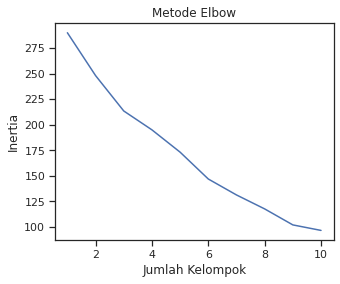

In [ ]:
#Metode elbow
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(5, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Metode Elbow')
ax.set_xlabel('Jumlah Kelompok')
ax.set_ylabel('Inertia')

plt.show()

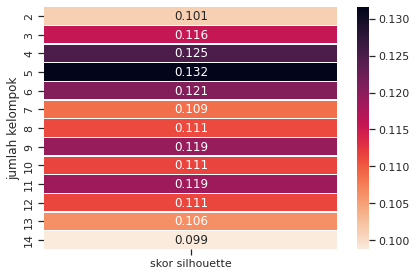

In [ ]:
#Metode silhouette

clusters_range = range(2,15)
results = []
for c in clusters_range:
  clusterer = KMeans(init='k-means++', n_clusters=c, n_init=100, random_state=42)
  clusters_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, clusters_labels)
  results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns = ["jumlah kelompok","skor silhouette"])
pivot_km = pd.pivot_table(result, index = "jumlah kelompok", values = 'skor silhouette')

plt.figure()
sns.heatmap(pivot_km, annot = True, linewidths = .5, fmt = '.3f', cmap = sns.cm.rocket_r)
plt.tight_layout()

Metode elbow merekomendasikan 3 cluster. Sedangkan pada metode indeks silhouette merekomendasikan 2 cluster. Namun, agar lebih banyak informasi yang dapat diperoleh, kami memilih untuk mengelompokkan provinsi di Indonesia ke dalam 3 cluster berdasarkan kesamaan karakteristik dalam kinerja pencegahan korupsi.

# Hierarchical Clustering

In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

--2021-12-15 16:27:57--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0s      

2021-12-15 16:27:57 (63.5 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import time, umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import cluster, datasets
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 42

Pada metode hierarchical clustering, akan dicoba menggunakan dua linkage, yaitu average linkage dan ward linkage

##Hierarchical Clustering with Average Linkage

In [ ]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:29]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
X.index = data.index

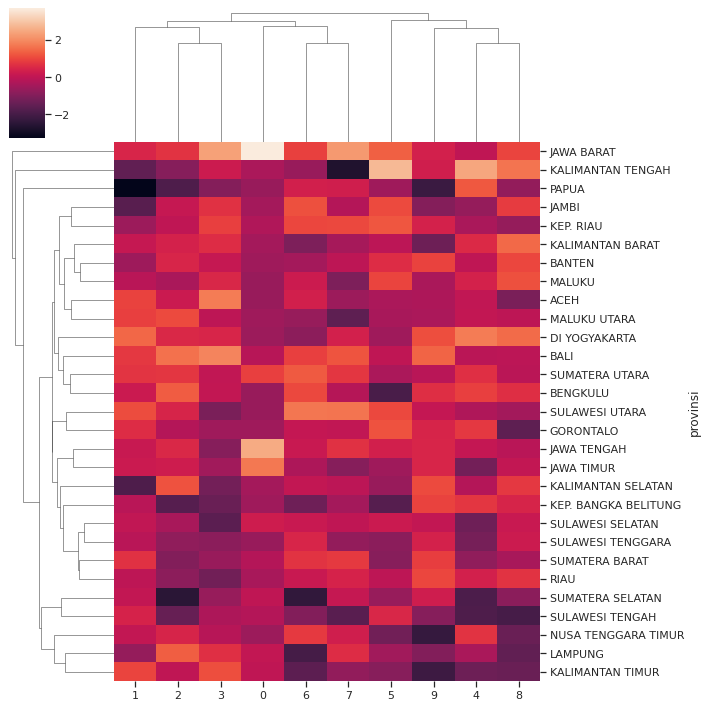

In [ ]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="average", metric="euclidean")

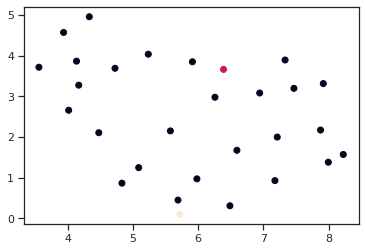

In [ ]:
# Scatter Plot of the hierarchical clustering results
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

Berdasarkan dendrogram, jika diambil 3 cluster maka terdapat cluster yang anggotanya hanya 1 provinsi, Sedangkan cluster lain jumlah anggotanya jauh lebih banyak.

## Hierarchical Clustering with Ward Linkage

In [ ]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:29]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 2])

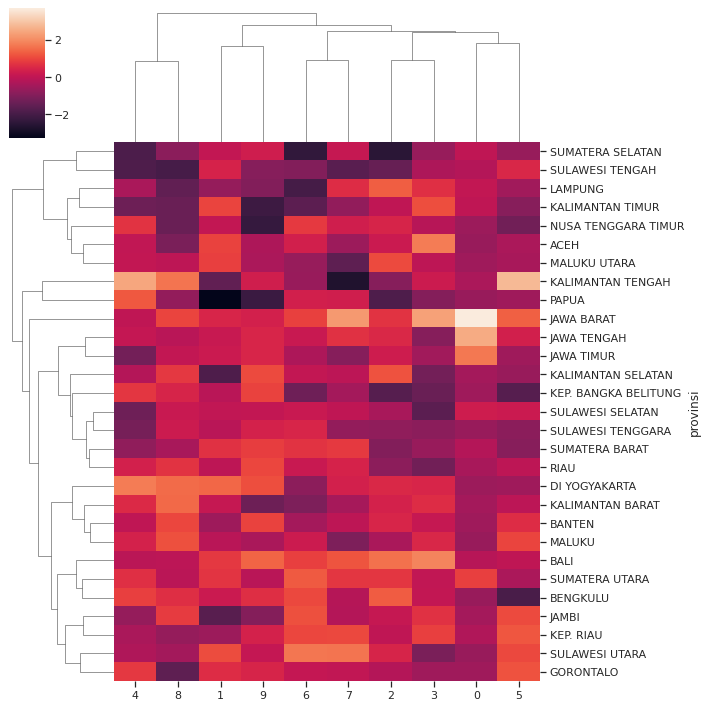

In [ ]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="ward", metric="euclidean")

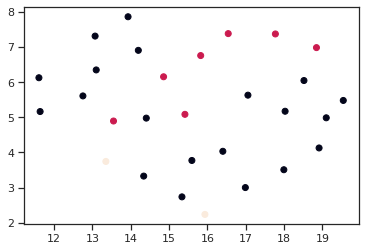

In [ ]:
# Scatter Plot of the hierarchical clustering results
X2D = umap.UMAP(n_neighbors=4, min_dist=0.80, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

Berdasarkan dendrogram, jika diambil 3 cluster maka terdapat cluster dengan jumlah anggota yang jauh lebih sedikit dibandingkan cluster lainnya. 

#Gaussian Clustering

Sama seperti K-means, penentuan jumlah cluster pada metode Gaussian Mixture clustering dilihat berdasarkan hasil dari indeks silhouette. Pemilihan jumlah cluster pada metode indeks silhouette dilihat berdasarkan nilai indeks silhouette terbesar.

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

#predictions from gmm
C_gmm = gmm.predict(X)


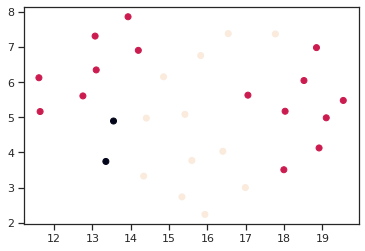

In [ ]:
# Scatter Plot of the gaussian clustering results
X2D = umap.UMAP(n_neighbors=4, min_dist=0.80, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_gmm)
plt.show()

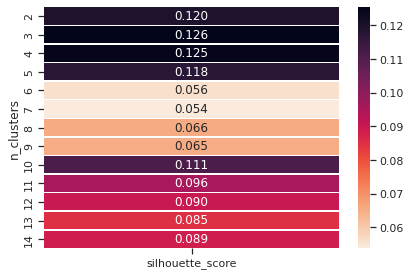

In [ ]:
#Metode silhouette

clusters_range = range(2,15)
results = []
for c in clusters_range:
  clusterer = GaussianMixture( n_components=c, n_init=100, random_state=42)
  clusters_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, clusters_labels)
  results.append([c,silhouette_avg])

result = pd.DataFrame(results, columns = ["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result, index = "n_clusters", values = 'silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot = True, linewidths = .5, fmt = '.3f', cmap = sns.cm.rocket_r)
plt.tight_layout()

##K-Means Clustering with 3 k

Metode clustering yang dipiih adalah k-means karena
*   Mudah dilakukan saat pengimpelementasian dan di jalankan
*   Sangat fleksibel, adaptasi yang mudah untuk di lakukan
*   Sangat umum penggunaannya
*   Menggunakan prinsip yang sederhana dapat di jelaskan dalam non-statistik








In [ ]:
#K-Means clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1], dtype=int32)

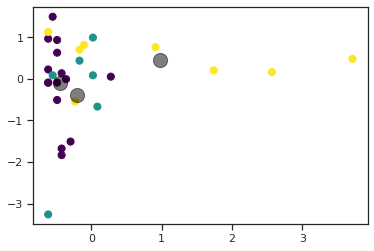

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
data['klaster'] = y_kmeans

In [ ]:
#Anggota masing-masing cluster
data['klaster']

provinsi
ACEH                    0
SUMATERA UTARA          2
SUMATERA BARAT          2
RIAU                    0
JAMBI                   0
SUMATERA SELATAN        1
BENGKULU                0
LAMPUNG                 1
KEP. BANGKA BELITUNG    0
KEP. RIAU               2
JAWA BARAT              2
JAWA TENGAH             2
DI YOGYAKARTA           0
JAWA TIMUR              2
BANTEN                  0
BALI                    2
NUSA TENGGARA TIMUR     1
KALIMANTAN BARAT        0
KALIMANTAN TENGAH       0
KALIMANTAN SELATAN      0
KALIMANTAN TIMUR        1
SULAWESI UTARA          2
SULAWESI TENGAH         1
SULAWESI SELATAN        0
SULAWESI TENGGARA       0
GORONTALO               0
MALUKU                  0
MALUKU UTARA            0
PAPUA                   1
Name: klaster, dtype: int32

Anggota masing-masing cluster:

cluster 1: sumsel, lampung, ntt, kaltim, sulteng, papua

cluster 2: sumut, jateng, jabar, jatim

cluster 0: aceh, sumbar, riau, jambi, bengkulu, babel, kepri, diy, banten, bali, kalbar, kalteng, kalsel, sulut, sulsel, sultra, gorontalo, maluku, maluku utara

In [ ]:
#karakteristik masing-masing cluster dilihat berdasarkan mean
grouped = data.groupby(['klaster']).mean().round(5)
grouped.transpose()

klaster,0,1,2
jumlah_gratifikasi,3.73333,7.50000,26.00000
laporan_kekayaan,83.32975,80.21147,89.16989
manajemen_aset_daerah,0.87727,0.74934,0.95437
optimalisasi_pajak_daerah,1.25321,1.29129,1.38948
manajemen_asn,1.12685,0.92863,1.00350
perizinan,0.58264,0.50974,0.61489
pengadaan barang dan jasa,0.84185,0.73877,0.94349
perencanaan_penganggaran_APBD,0.81403,0.83970,0.93581
APIP,1.34828,0.97328,1.22108
tata_kelola_dana_desa,0.41679,0.30413,0.43392


Untuk memudahkan, kami mengganti no cluster sebagai berikut

Cluster 0 ==> Cluster 1

Cluster 1 ==> Cluster 2

Cluster 2 ==> Cluster 3

Karakteristik cluster dilihat berdasarkan mean masing-masing variabel di setiap cluster. Tata kelola dana desa dan perizinan nilainya masih sangat kecil pada ketiga cluster. Secara keseluruhan, rata-rata setiap variabel di cluster 3 paling tinggi dibandingkan 2 cluster lain, dapat dikatakan bahwa cluster 3 sudah optimal dalam kinerja pencegahan korupsi. Cluster 1 dikatakan cukup optimal dalam kinerja pencegahan korupsi. Sementara itu, cluster 2 masih belum optimal dalam kinerja pencegahan korupsi dikarenakan rata-rata yang masih rendah dibandingkan 2 cluster lainnya di hampir semua variabel.

#Visualisasi Hasil Clustering

Agar lebih representatif, karakteristik masing-masing cluster ditampilkan dalam bentuk visualisasi.

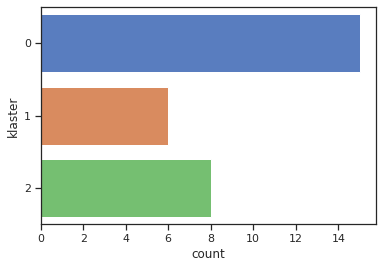

In [ ]:
klaster_grafik = sns.countplot(y = 'klaster', palette = 'muted', data=data)

Cluster 1 sebanyak 15 porvinsi, cluster 2 sebanyak 6 provinsi, dan cluster 3 sebanyak 8 provinsi

##Visualisasi Gratifikasi dan LHKPN

In [ ]:
data.head()

,jumlah_gratifikasi,laporan_kekayaan,manajemen_aset_daerah,optimalisasi_pajak_daerah,manajemen_asn,perizinan,pengadaan barang dan jasa,perencanaan_penganggaran_APBD,APIP,tata_kelola_dana_desa,klaster
provinsi,,,,,,,,,,,
ACEH,1,94.444444,0.913278,1.872340,1.065071,0.536911,0.889354,0.805041,1.009875,0.379208,0
SUMATERA UTARA,25,92.307692,1.022558,1.313320,1.199450,0.538340,1.000495,0.921832,1.223571,0.392798,2
SUMATERA BARAT,8,91.666667,0.691020,1.110359,0.890132,0.466137,0.934580,0.925511,1.163571,0.460832,2
RIAU,5,84.210526,0.723602,0.904623,1.134642,0.577600,0.869697,0.889796,1.387875,0.470192,0
JAMBI,4,66.666667,0.898492,1.526764,0.906994,0.713629,0.982497,0.839680,1.415000,0.333772,0


In [ ]:
klaster1 = data.loc[data['klaster'] == 0]
klaster2 = data.loc[data['klaster'] == 1]
klaster3 = data.loc[data['klaster'] == 2]

In [ ]:
deskripsi_klaster1 = klaster1.describe().transpose()
deskripsi_klaster2 = klaster2.describe().transpose()
deskripsi_klaster3 = klaster3.describe().transpose()


In [ ]:
mean_klaster1 = pd.DataFrame(deskripsi_klaster1['mean'])
mean_klaster2 = pd.DataFrame(deskripsi_klaster2['mean'])
mean_klaster3 = pd.DataFrame(deskripsi_klaster3['mean'])


In [ ]:
mean_klaster1 = mean_klaster1.drop(['manajemen_aset_daerah',
                                    'optimalisasi_pajak_daerah',
                                    'manajemen_asn',
                                    'perizinan',
                                    'pengadaan barang dan jasa',
                                    'perencanaan_penganggaran_APBD',
                                    'APIP',
                                    'tata_kelola_dana_desa',
                                    'klaster'])
mean_klaster1.reset_index(level=0, inplace=True)
mean_klaster1['klaster'] = [1,1]
mean_klaster1.columns= ['area_intervensi','mean', 'klaster']
mean_klaster1

,area_intervensi,mean,klaster
0,jumlah_gratifikasi,3.733333,1
1,laporan_kekayaan,83.329749,1


In [ ]:
mean_klaster2 = mean_klaster2.drop(['manajemen_aset_daerah',
                                    'optimalisasi_pajak_daerah',
                                    'manajemen_asn',
                                    'perizinan',
                                    'pengadaan barang dan jasa',
                                    'perencanaan_penganggaran_APBD',
                                    'APIP',
                                    'tata_kelola_dana_desa',
                                    'klaster'])
mean_klaster2.reset_index(level=0, inplace=True)
mean_klaster2['klaster'] = [2,2]
mean_klaster2.columns = ['area_intervensi','mean','klaster']
mean_klaster2

,area_intervensi,mean,klaster
0,jumlah_gratifikasi,7.500000,2
1,laporan_kekayaan,80.211471,2


In [ ]:
mean_klaster3 = mean_klaster3.drop(['manajemen_aset_daerah',
                                    'optimalisasi_pajak_daerah',
                                    'manajemen_asn',
                                    'perizinan',
                                    'pengadaan barang dan jasa',
                                    'perencanaan_penganggaran_APBD',
                                    'APIP',
                                    'tata_kelola_dana_desa',
                                    'klaster'])
mean_klaster3.reset_index(level=0, inplace=True)
mean_klaster3['klaster'] = [3,3]
mean_klaster3.columns= ['area_intervensi','mean','klaster']
mean_klaster3

,area_intervensi,mean,klaster
0,jumlah_gratifikasi,26.000000,3
1,laporan_kekayaan,89.169895,3


In [ ]:
mean_gratif_lhkpn = pd.concat([mean_klaster1,mean_klaster2]).drop_duplicates().reset_index(drop=True)
mean_gratif_lhkpn = pd.concat([mean_gratif_lhkpn,mean_klaster3]).drop_duplicates().reset_index(drop=True)
mean_gratif_lhkpn

,area_intervensi,mean,klaster
0,jumlah_gratifikasi,3.733333,1
1,laporan_kekayaan,83.329749,1
2,jumlah_gratifikasi,7.500000,2
3,laporan_kekayaan,80.211471,2
4,jumlah_gratifikasi,26.000000,3
5,laporan_kekayaan,89.169895,3


In [ ]:
mean_gratif_lhkpn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_intervensi  6 non-null      object 
 1   mean             6 non-null      float64
 2   klaster          6 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [ ]:
mean_gratif_lhkpn['area_intervensi'] = mean_gratif_lhkpn['area_intervensi'].astype('category')
mean_gratif_lhkpn['klaster'] = mean_gratif_lhkpn['klaster'].astype('category')
mean_gratif_lhkpn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area_intervensi  6 non-null      category
 1   mean             6 non-null      float64 
 2   klaster          6 non-null      category
dtypes: category(2), float64(1)
memory usage: 388.0 bytes


Text(0.5, 1.0, 'Deskripsi Jumlah Gratifikasi dan LHKPN')

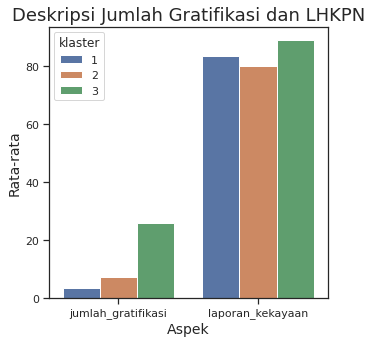

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x="area_intervensi", 
            y="mean", 
            hue="klaster", 
            data=mean_gratif_lhkpn)
plt.ylabel("Rata-rata", size=14)
plt.xlabel("Aspek", size=14)
plt.title("Deskripsi Jumlah Gratifikasi dan LHKPN", size=18)

- Untuk jumlah gratifikasi cluster 1 paling rendah

- Untuk laporan kekayaan cluster 2 yang paling rendah

- Cluster 3 memiliki rata-rata tertinggi untuk jumlah gratifikasi dan laporan kekayaan

##Visualisasi Koordinasi Wilayah (8 area intervensi)

In [ ]:
klaster1 = data.loc[data['klaster'] == 0]
klaster2 = data.loc[data['klaster'] == 1]
klaster3 = data.loc[data['klaster'] == 2]

In [ ]:
deskripsi_klaster1 = klaster1.describe().transpose()
deskripsi_klaster2 = klaster2.describe().transpose()
deskripsi_klaster3 = klaster3.describe().transpose()


In [ ]:
mean_klaster1 = pd.DataFrame(deskripsi_klaster1['mean'])
mean_klaster2 = pd.DataFrame(deskripsi_klaster2['mean'])
mean_klaster3 = pd.DataFrame(deskripsi_klaster3['mean'])


In [ ]:
mean_klaster1 = mean_klaster1.drop(['jumlah_gratifikasi','laporan_kekayaan','klaster'])
mean_klaster1.reset_index(level=0, inplace=True)
mean_klaster1['klaster'] = [1,1,1,1,1,1,1,1]
mean_klaster1.columns= ['area_intervensi','mean', 'klaster']
mean_klaster1

,area_intervensi,mean,klaster
0,manajemen_aset_daerah,0.877268,1
1,optimalisasi_pajak_daerah,1.253212,1
2,manajemen_asn,1.126854,1
3,perizinan,0.582636,1
4,pengadaan barang dan jasa,0.841848,1
5,perencanaan_penganggaran_APBD,0.814032,1
6,APIP,1.348276,1
7,tata_kelola_dana_desa,0.416790,1


In [ ]:
mean_klaster2 = mean_klaster2.drop(['jumlah_gratifikasi','laporan_kekayaan','klaster'])
mean_klaster2.reset_index(level=0, inplace=True)
mean_klaster2['klaster'] = [2,2,2,2,2,2,2,2]
mean_klaster2.columns = ['area_intervensi','mean','klaster']
mean_klaster2

,area_intervensi,mean,klaster
0,manajemen_aset_daerah,0.749342,2
1,optimalisasi_pajak_daerah,1.291287,2
2,manajemen_asn,0.928634,2
3,perizinan,0.509742,2
4,pengadaan barang dan jasa,0.738773,2
5,perencanaan_penganggaran_APBD,0.839699,2
6,APIP,0.973283,2
7,tata_kelola_dana_desa,0.304135,2


In [ ]:
mean_klaster3 = mean_klaster3.drop(['jumlah_gratifikasi','laporan_kekayaan','klaster'])
mean_klaster3.reset_index(level=0, inplace=True)
mean_klaster3['klaster'] = [3,3,3,3,3,3,3,3]
mean_klaster3.columns= ['area_intervensi','mean','klaster']
mean_klaster3

,area_intervensi,mean,klaster
0,manajemen_aset_daerah,0.954371,3
1,optimalisasi_pajak_daerah,1.389477,3
2,manajemen_asn,1.003496,3
3,perizinan,0.614892,3
4,pengadaan barang dan jasa,0.943495,3
5,perencanaan_penganggaran_APBD,0.935808,3
6,APIP,1.221080,3
7,tata_kelola_dana_desa,0.433925,3


In [ ]:
mean_nilai_intervensi = pd.concat([mean_klaster1,mean_klaster2]).drop_duplicates().reset_index(drop=True)
mean_nilai_intervensi = pd.concat([mean_nilai_intervensi,mean_klaster3]).drop_duplicates().reset_index(drop=True)
mean_nilai_intervensi

,area_intervensi,mean,klaster
0,manajemen_aset_daerah,0.877268,1
1,optimalisasi_pajak_daerah,1.253212,1
2,manajemen_asn,1.126854,1
3,perizinan,0.582636,1
4,pengadaan barang dan jasa,0.841848,1
5,perencanaan_penganggaran_APBD,0.814032,1
6,APIP,1.348276,1
7,tata_kelola_dana_desa,0.416790,1
8,manajemen_aset_daerah,0.749342,2
9,optimalisasi_pajak_daerah,1.291287,2


In [ ]:
mean_nilai_intervensi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_intervensi  24 non-null     object 
 1   mean             24 non-null     float64
 2   klaster          24 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 704.0+ bytes


In [ ]:
mean_nilai_intervensi['area_intervensi'] = mean_nilai_intervensi['area_intervensi'].astype('category')
mean_nilai_intervensi['klaster'] = mean_nilai_intervensi['klaster'].astype('category')
mean_nilai_intervensi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area_intervensi  24 non-null     category
 1   mean             24 non-null     float64 
 2   klaster          24 non-null     category
dtypes: category(2), float64(1)
memory usage: 856.0 bytes


Text(0.5, 1.0, 'Deskripsi Area Intervensi')

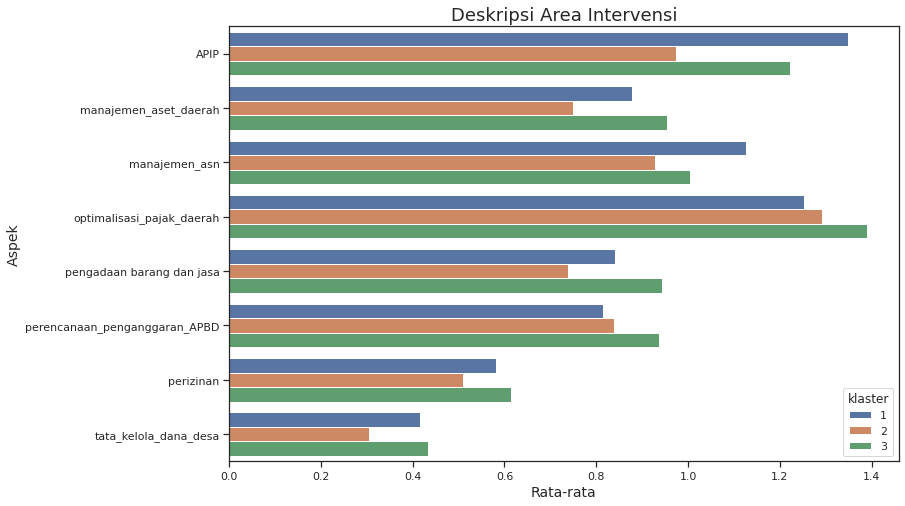

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="mean", 
            y="area_intervensi", 
            hue="klaster", 
            data=mean_nilai_intervensi)
plt.ylabel("Aspek", size=14)
plt.xlabel("Rata-rata", size=14)
plt.title("Deskripsi Area Intervensi", size=18)

- Tata kelola dana desa untuk seluruh cluster nilainya masih sangat kecil, terutama di cluster 2. 

- Untuk nilai area intervensi, rata-rata cluster 2 lebih kecil dibandingkan cluster lainnya hampir di segala aspek

- Cluster 3 memiliki nilai area intervensi paling tinggi dibandingkan cluster lain hampir di segala aspek (cluster 3 sudah optimal dalam pelaksanaan pencegahan korupsi)


# Kesimpulan

*   Provinsi-provinsi di Indonesia dikelompokkan ke dalam 3 cluster berdasarkan kinerja pencegahan korupsi
*   Agar upaya pencegahan korupsi yang mencakup pelaporan gratifikasi, LHKPN dan delapan area intervensi dapat terlaksana secara merata di Indonesia, maka terdapat beberapa aspek yang harus dioptimalkan di masing-masing kelompok, yaitu:
  - **Cluster 1 (cukup optimal)**, aspek yang harus dioptimalkan adalah jumlah laporan gratifikasi dan delapan area intervensinya, terutama optimalisasi pajak daerah dan perencanaan dan penganggaran APBD
  - **Cluster 2 (belum optimal)**, aspek yang harus dioptimalkan adalah laporan kekayaan dan delapan area intervensinya, terutama manajemen aset daerah dan manajemen ASN
  - **Cluster 3 (sudah optimal)**, aspek yang harus dioptimalkan adalah delapan area intervensinya, terutama manajemen ASN dan APIP


